In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Load and prepare data
Load the data stored on the filesystem generated by the other notebooks.

In [71]:
df = pd.read_csv('postcodes_canada2.csv')
df = df[df['Borough'].str.contains('Toronto')] # filter out only Toronto

## First we make a quick draw of the coordinates

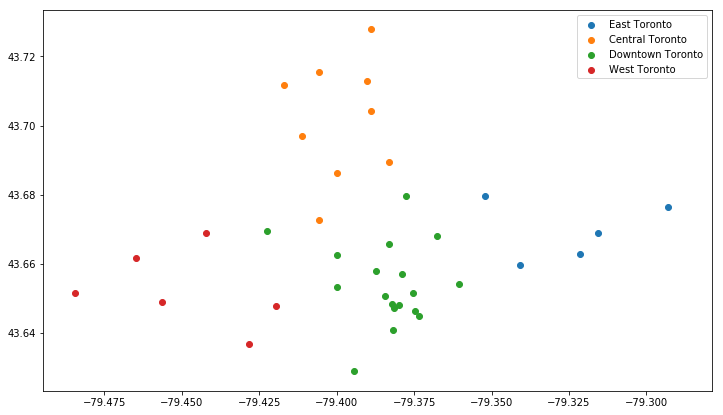

In [72]:
plt.figure(figsize=(12,7))

for b in df['Borough'].drop_duplicates():
    filtered = df[df['Borough']==b]
    plt.scatter( filtered.Longitude, filtered.Latitude, label=b)
    
plt.legend()

# Run KNN

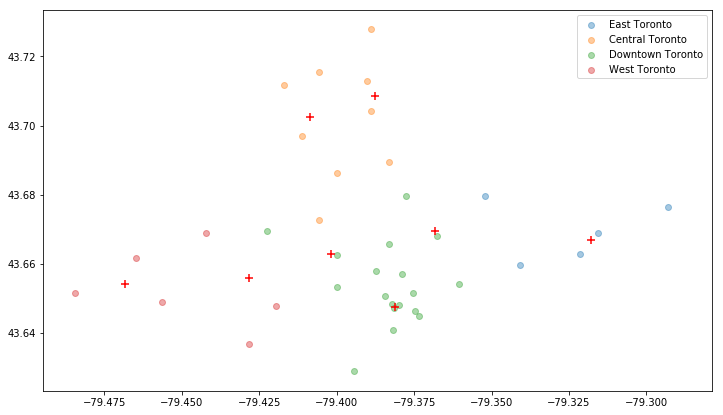

In [73]:
knn = KMeans(n_clusters=8)

# Train KMeans
X = df[['Longitude','Latitude']]
knn.fit(X)

# Get the clustered centers
knn.cluster_centers_
longs = [x[0] for x in knn.cluster_centers_]
lats  = [x[1] for x in knn.cluster_centers_]

# Plot the the same figure with aplha and the centroids.
plt.figure(figsize=(12,7))
for b in df['Borough'].drop_duplicates():
    filtered = df[df['Borough']==b]
    plt.scatter( filtered.Longitude, filtered.Latitude, label=b,alpha=0.4)
    
plt.legend()
plt.scatter(longs, lats, c='red',s=80,marker='+')

When applying KMean on with 8 k we can se the most of the centroids is centered around Downtown Toronto borough.This means that most of the neighbourhoods is located there. The red plusses are the centroids given by the KMean algorithim. I have never been on the Amarican continent at all.